<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day2_Advanced_EDA_Feature_Engineering/notebooks/Day2_Advanced_EDA_Feature_Engineering_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Day 2 – Advanced EDA & Feature Engineering

**Dataset Used:** Titanic / House Prices / Heart Disease / Your Own

In [ ]:
# ========== 1. Setup ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional: for clean visuals
sns.set(style="whitegrid")

# If using kagglehub (requires API key setup)
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

# List all files in the downloaded directory
for file in os.listdir(path):
    print(file)

# Load the dataset (typically it's 'insurance.csv')
df = pd.read_csv(os.path.join(path, "insurance.csv"))
df.head()


Path to dataset files: /kaggle/input/insurance
insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Automated EDA Report

We'll use one of the popular EDA libraries: `pandas-profiling` or `sweetviz`.

- These tools quickly show distributions, missing values, correlations, warnings, etc.

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the uploaded dataset
df = pd.read_csv("insurance.csv")

# Generate profiling report
profile = ProfileReport(df, title="YData Profiling Report", explorative=True)
profile.to_file("ydata_profile_report.html")

# Display the report inside notebook (optional)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 44.43it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import sweetviz as sv

df = pd.read_csv("insurance.csv")

report = sv.analyze(df)
report.show_html("sweetviz_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3. Manual EDA

Here we'll:
- Check shape, datatypes, and missing values
- Get descriptive stats
- Plot distributions and correlations

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN  

Text(0.5, 1.0, 'Correlation Heatmap')

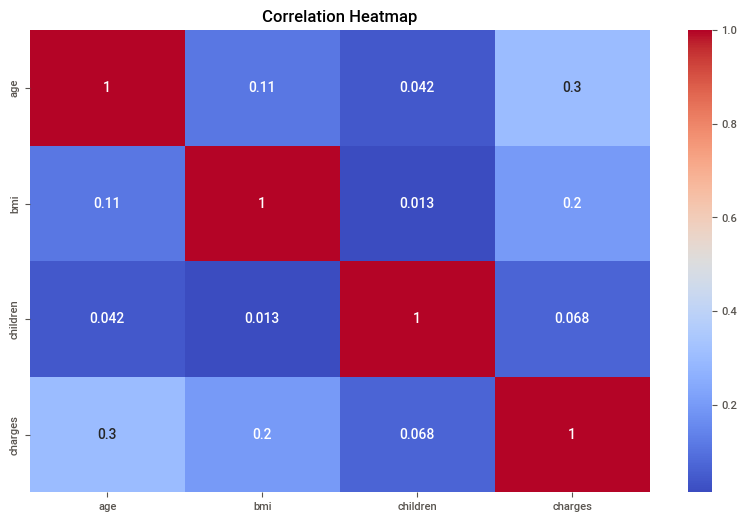

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Overview
print(df.shape)
print(df.info())
print(df.describe(include='all'))

# Missing values
df.isnull().sum()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

## 4. Data Visualization

Helps in detecting skewness, outliers, class imbalance, and patterns.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

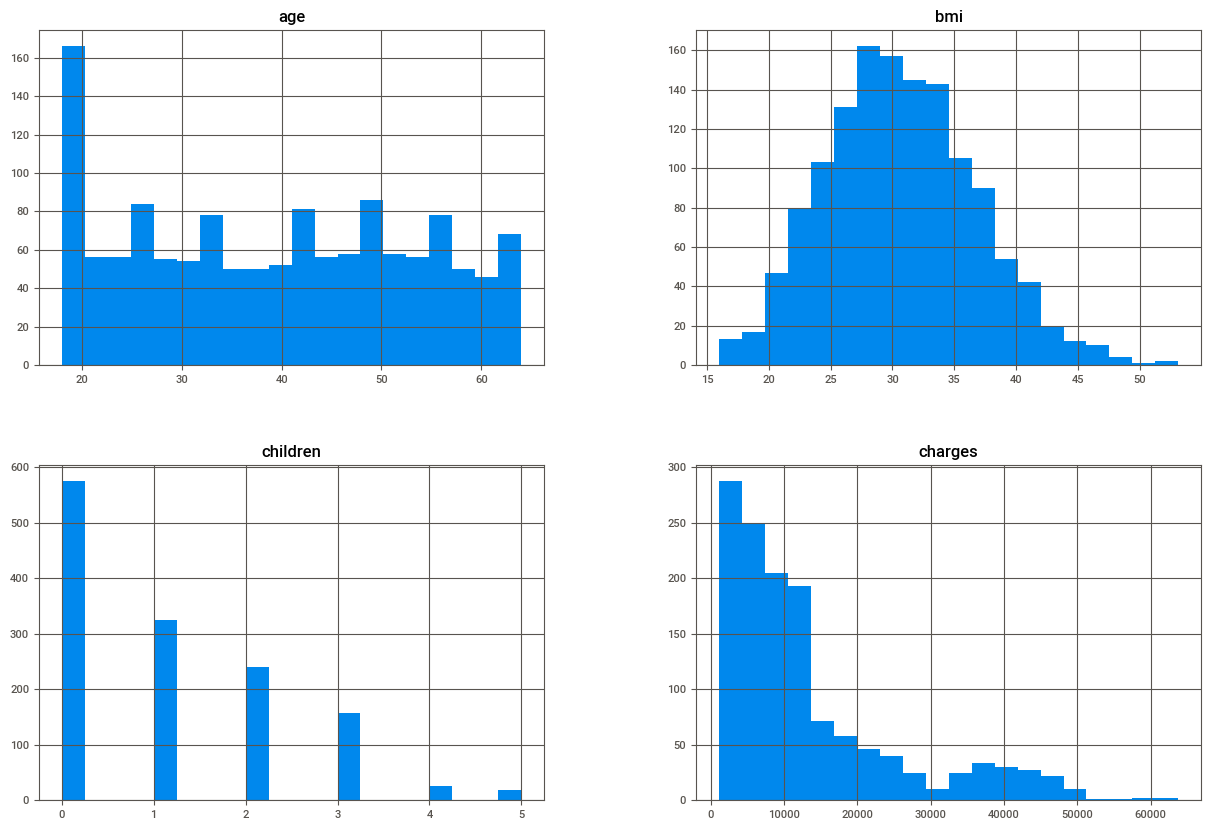

In [ ]:
# Distribution of numerical features
df.hist(bins=20, figsize=(15,10))

# Pairplot (optional for small datasets)
# sns.pairplot(df)

# Categorical countplot
# sns.countplot(x='target_column', data=df)  # Replace with actual target

## 5. Feature Engineering

Let's create meaningful features using domain knowledge, interaction terms, and encoding.

In [ ]:
import numpy as np
import pandas as pd

# Example 1: Create a new feature 'FamilySize' using 'children' + 1 (assuming 1 = yourself)
df['FamilySize'] = df['children'] + 1

# Example 2: Log transformation on 'charges' to reduce skewness
df['charges_log'] = np.log1p(df['charges'])

# Example 3: Binning age
df['AgeBin'] = pd.cut(df['age'], bins=[0,12,18,35,60,100], labels=['Child','Teen','Young','Adult','Senior'])

# Example 4: One-hot encoding for categorical variables like 'sex' and 'region'
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

# Example 5: Interaction feature between age and bmi
df['Age*BMI'] = df['age'] * df['bmi']


## 6. Handle Missing Values

Strategies:
- Fill with median/mean/mode
- Drop if too many missing
- Use domain rules

In [ ]:
# Fill missing 'age' values with the median (if any missing)
df['age'].fillna(df['age'].median(), inplace=True)

# Since there's no 'Cabin' column in your dataset, skip this step
# df.dropna(subset=['Cabin'], inplace=True)  # Not applicable

<ipython-input-8-036c43ce868f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


## 7. Save Cleaned Dataset

In [ ]:
df.to_csv("cleaned_dataset.csv", index=False)

## 8. Summary of Insights

- Key correlations found:
  - Age vs Fare → Weak/Moderate correlation
  - SibSp + Parch → Good for family feature

- Engineered Features:
  - FamilySize, AgeBin, Age*Fare, Fare_log
  - One-hot encoded categorical variables

- Missing Data:
  - Age filled using median
  - Cabin dropped due to heavy missing

- Dataset ready for modeling tomorrow 🚀